In [1]:
"""
Particle Swarm Optimization for Linear Regression
Author: [Alaa Tharwat]
Date: [13.03.2025]
Learning From Data (LFD) Course
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
# ---------------------------
# 1. Utility Functions
# ---------------------------

def predict(inputs, weights):
    """Make prediction using linear model"""
    return np.dot(inputs, weights)

def calculate_mse(X, y, weights):
    """Calculate Mean Squared Error"""
    predictions = predict(X, weights)
    return np.mean((predictions - y)**2)

# ---------------------------
# 2. PSO Implementation
# ---------------------------

def initialize_particles(n_particles, n_features):
    """Initialize particle positions and velocities"""
    positions = np.random.rand(n_features, n_particles)
    velocities = np.random.randn(n_features, n_particles) * 0.1
    return positions, velocities

def update_particles(X, y, positions, velocities, pbest_positions, pbest_scores, gbest_position, gbest_score):
    """Update particle positions and velocities"""
    # Hyperparameters
    inertia_weight = 0.8
    cognitive_weight = 1.5
    social_weight = 1.5
    
    # Update velocities and positions
    r1, r2 = np.random.rand(2)
    velocities = (inertia_weight * velocities + 
                 cognitive_weight * r1 * (pbest_positions - positions) + 
                 social_weight * r2 * (gbest_position.reshape(-1,1) - positions))
    
    new_positions = positions + velocities
    new_scores = np.array([calculate_mse(X, y, new_positions[:,i]) 
                          for i in range(new_positions.shape[1])])
    
    # Update personal bests
    improved_particles = new_scores < pbest_scores
    pbest_positions[:, improved_particles] = new_positions[:, improved_particles]
    pbest_scores[improved_particles] = new_scores[improved_particles]
    
    # Update global best
    current_best_idx = np.argmin(pbest_scores)
    current_best_score = pbest_scores[current_best_idx]
    
    if current_best_score < gbest_score:
        gbest_score = current_best_score
        gbest_position = pbest_positions[:, current_best_idx]
    
    return new_positions, velocities, pbest_positions, pbest_scores, gbest_position, gbest_score

Iteration   0 | Best MSE: 8085.38
Iteration  10 | Best MSE: 6068.38
Iteration  20 | Best MSE: 3292.44
Iteration  30 | Best MSE: 1095.66
Iteration  40 | Best MSE: 399.46
Iteration  50 | Best MSE: 302.22
Iteration  60 | Best MSE: 302.22
Iteration  70 | Best MSE: 302.22
Iteration  80 | Best MSE: 302.22
Iteration  90 | Best MSE: 302.22
Iteration 100 | Best MSE: 302.22
Iteration 110 | Best MSE: 302.22
Iteration 120 | Best MSE: 302.22
Iteration 130 | Best MSE: 302.22
Iteration 140 | Best MSE: 302.22
Iteration 150 | Best MSE: 302.22
Iteration 160 | Best MSE: 302.22
Iteration 170 | Best MSE: 302.22
Iteration 180 | Best MSE: 302.22
Iteration 190 | Best MSE: 302.22
Iteration 200 | Best MSE: 302.22
Iteration 210 | Best MSE: 302.22
Iteration 220 | Best MSE: 302.22
Iteration 230 | Best MSE: 302.22
Iteration 240 | Best MSE: 302.22
Iteration 250 | Best MSE: 302.22
Iteration 260 | Best MSE: 302.22
Iteration 270 | Best MSE: 302.22
Iteration 280 | Best MSE: 302.22
Iteration 290 | Best MSE: 302.22
Iterat

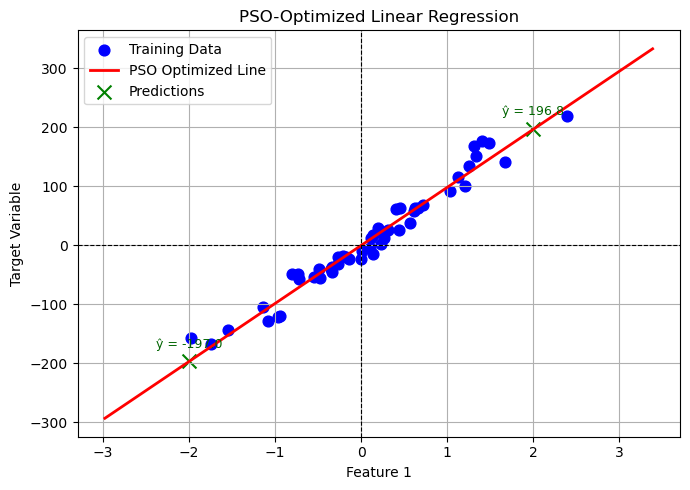

In [5]:
# ---------------------------
# 3. Main Execution
# ---------------------------

# Generate synthetic data
np.random.seed(10)
X, y = make_regression(n_samples=50, n_features=1, noise=15, random_state=10)
X = np.c_[np.ones(len(X)), X]  # Add bias term

# Define two sample points for prediction
x_sample = np.array([[-2], [2]])
x_new_sample = np.c_[np.ones(len(x_sample)), x_sample.flatten()]  # Add bias to sample points

# PSO parameters
n_particles = 50
max_iterations = 500

# Initialize swarm
positions, velocities = initialize_particles(n_particles, X.shape[1])
pbest_positions = positions.copy()
pbest_scores = np.array([calculate_mse(X, y, positions[:,i]) 
                        for i in range(positions.shape[1])])
gbest_idx = np.argmin(pbest_scores)
gbest_position = pbest_positions[:, gbest_idx]
gbest_score = pbest_scores[gbest_idx]

# Optimization loop
for iter in range(max_iterations):
    positions, velocities, pbest_positions, pbest_scores, gbest_position, gbest_score = update_particles(
        X, y, positions, velocities, pbest_positions, pbest_scores, gbest_position, gbest_score
    )
    if iter % 10 == 0:
        print(f"Iteration {iter:3d} | Best MSE: {gbest_score:.2f}")

# 4. Visualization (Harmonized Style)
# ---------------------------

# Create figure with consistent styling
plt.figure(figsize=(7, 5))

# Plot training data with same markers/colors
plt.scatter(X[:,1], y, s=60, marker='o', label='Training Data', color='blue')

# Plot regression line with matching style
x_line = np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100)
y_line = gbest_position[0] + gbest_position[1]*x_line
plt.plot(x_line, y_line, color='red', linewidth=2, label='PSO Optimized Line')

# Plot predictions with consistent markers
predictions = predict(x_new_sample, gbest_position)
plt.scatter(x_sample, predictions, s=100, marker='x', color='green', label='Predictions')

# Add axis lines and labels matching the example
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.8)
plt.xlabel("Feature 1")
plt.ylabel("Target Variable")
plt.title('PSO-Optimized Linear Regression')
plt.legend()
plt.grid(True)

# Add prediction annotations in similar style
for x_val, y_pred in zip(x_sample.flatten(), predictions):
    plt.annotate(f'ŷ = {y_pred:.1f}', (x_val, y_pred),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center',
                 fontsize=9,
                 color='darkgreen')

plt.tight_layout()
plt.show()

In [7]:
# ---------------------------
# 5. Formatted Final Output
# ---------------------------
print("\n=== PSO Optimization Results ===")
print(f"Optimal bias (w₀): {gbest_position[0]:.4f}")
print(f"Optimal slope (w₁): {gbest_position[1]:.4f}")
print(f"Minimum MSE achieved: {gbest_score:.4f}")
print("\nSample Predictions:")
for x_val, y_pred in zip(x_sample.flatten(), predictions):
    print(f"  At x = {x_val:3.0f}: Predicted y = {y_pred:.1f}")


=== PSO Optimization Results ===
Optimal bias (w₀): -0.1191
Optimal slope (w₁): 98.4497
Minimum MSE achieved: 302.2204

Sample Predictions:
  At x =  -2: Predicted y = -197.0
  At x =   2: Predicted y = 196.8
